# Binary Trees
- is either empty, or
- a root node r together with a left binary tree and a right binary tree.

In [16]:
class BinaryTreeNode:
    def __init__(self, data=None, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
    def __repr__(self):
        return f"BinaryTreeNode(data:{self.data})"

### Search Path
For every node, there exists a unique path from root to that node with each node in the sequence being a child of previous node. This sequence is known as Search Path from root to that node.

### Ancestor-Descendant
We say a node is a ancestor of a node d, if it lies in the search path of d and d will be it's descendant.

A node is a ancestor and descendant of itself.

### Depth
depth of a node n is the number of nodes on the search path from root to n, not including n itself.
### Height
height of a binary tree is the maximum depth of any node in the tree.
### Level
all nodes at same depth are called to be at same level.

### Full Binary Tree
binary tree in which every node other than the leaves has two children.<br>
min-nodes: $2^{h} + 1$, for height $h$. <br>
max-nodes: $2^{h+1} - 1$, for height $h$. <br>
height: $\big\lfloor \lg(n) \big\rfloor$ ,for $n$ nodes.

### Perfect Binary Tree
full binary tree in which all leaves are at same depth.<br>
min-height = max-height = $\lg(n+1) - 1$, for $n$ nodes.<br>
number of nodes = $2^{h+1} - 1$ for $h$ height

### Complete Binary Tree
binary tree in which every level, except possibly the last, is completely filled.<br>
min-nodes: $2^{h}$, for height $h$ <br>
max-nodes: $2^{h+1} - 1$ for height $h$ <br>
height: $\big\lfloor \lg(n) \big\rfloor$ ,for $n$ nodes.

### Skewed Binary Tree
**Left-skewed:** A tree in which no node has a right child.<br>
**Right-skewed:** A tree in which no node has a left child.

## Traversal
**Preorder:** root -> left -> right <br>
**Postorder:** left -> right -> root <br>
**Inorder:** left -> root -> right

In [2]:
c = BinaryTreeNode(4)
d = BinaryTreeNode(5)
e = BinaryTreeNode(6)

a = BinaryTreeNode(2, c ,d)
b = BinaryTreeNode(3, e)
root = BinaryTreeNode(1, a, b)

In [3]:
import iplantuml

Writing output for /home/shaker/Documents/Github/AlgoRhythms/EPI/c7f2eed0-6550-43e7-a8c4-6c213bdc82dc.uml to c7f2eed0-6550-43e7-a8c4-6c213bdc82dc.svg


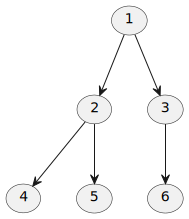

In [4]:
%%plantuml
@startuml
(1) --> (2)
(1) --> (3)
(2) --> (4)
(2) --> (5)
(3) --> (6)
@enduml

In [5]:
def inorder_tree_traversal(root):
    if root:
        inorder_tree_traversal(root.left)
        print(root.data, end=" ")
        inorder_tree_traversal(root.right)
inorder_tree_traversal(root)

4 2 5 1 6 3 

In [6]:
def postorder_tree_traversal(root):
    if root:
        postorder_tree_traversal(root.left)
        postorder_tree_traversal(root.right)
        print(root.data, end=" ")
postorder_tree_traversal(root)

4 5 2 6 3 1 

In [7]:
def preorder_tree_traversal(root):
    if root:
        print(root.data, end=" ")
        preorder_tree_traversal(root.left)
        preorder_tree_traversal(root.right)
preorder_tree_traversal(root)

1 2 4 5 3 6 

In [8]:
def height(root):
    if not root:
        return -1
    ldepth = height(root.left)
    rdepth = height(root.right)
    return max(ldepth, rdepth) + 1
height(root)

2

## Binary Tree from list

In [61]:
def binary_tree(nodes: list) -> BinaryTreeNode:
    if not nodes: return None
    from collections import deque
    queue = deque()
    root = BinaryTreeNode(nodes[0])
    queue.append(root)
    for i in range(len(nodes) // 2):
        node = queue.popleft()
        while not node:
            node = queue.popleft()
            if not queue: return root
        node.left = None if nodes[2*i+1] is None else BinaryTreeNode(nodes[2*i+1])
        node.right = None if nodes[2*i+2] is None else BinaryTreeNode(nodes[2*i+2])
        queue.append(node.left)
        queue.append(node.right)
    return root

## Test If a binary tree is height-balanced

Writing output for /home/shaker/Documents/Github/AlgoRhythms/EPI/e50320db-f654-4e13-bb96-276647bcaadf.uml to e50320db-f654-4e13-bb96-276647bcaadf.svg


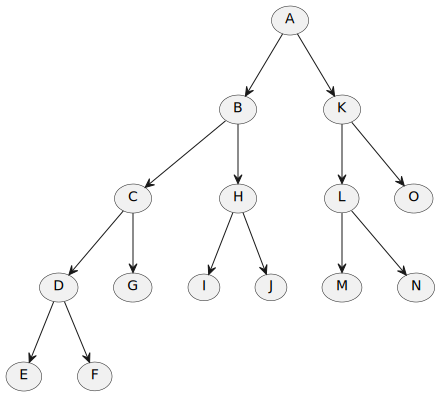

In [9]:
%%plantuml
@startuml
(A) --> (B)
(B) --> (C)
(B) --> (H)
(C) --> (D)
(C) --> (G)
(D) --> (E)
(D) --> (F)
(H) --> (I)
(H) --> (J)
(A) --> (K)
(K) --> (L)
(L) --> (M)
(L) --> (N)
(K) --> (O)
@enduml

In [69]:
def is_height_balanced(root):
    if not root:
        return 1
    l = is_height_balanced(root.left)
    r = is_height_balanced(root.right)
    if not (l and r) or abs(l - r) > 1:
        return False
    else:
        if abs(l - r) < 2:
            return max(l, r) + 1
root = binary_tree(["A", "B", "K", "C", "H", "L", "O", "D", "G", "I", "J", "M", "N", None, None, "E", "F"])
root = binary_tree([3,9,20,None,None,15,7])
root = binary_tree([1,2,2,3,3,None,None,4,4])
bool(is_height_balanced(root))

False

## Book Solution

In [72]:
def is_balanced_tree(root):
    from collections import namedtuple
    BalancedStatusWithHeight = namedtuple('BalancedStatusWithHeight', ('balanced', 'height'))
    def check_balanced(tree):
        if not tree:
            return BalancedStatusWithHeight(True, -1)

        left_result = check_balanced(tree.left)
        if not left_result.balanced:
            return BalancedStatusWithHeight(False, 0)
        
        right_result = check_balanced(tree.right)
        if not right_result.balanced:
            return BalancedStatusWithHeight(False, 0)

        is_balanced = abs(left_result.height - right_result.height) <= 1
        height = max(left_result.height, right_result.height) + 1
        return BalancedStatusWithHeight(is_balanced, height)

    return check_balanced(root).balanced
root = binary_tree([1,2,2,3,3,None,None,4,4])
root = binary_tree([3,9,20,None,None,15,7])
is_balanced_tree(root)

True

## Variants
Q. Write a program that returns the size of the largest subtree that is complete

Q. Define a node in a binary tree to be k-balanced if the difference in the number of nodes in its left and right subtrees is no more than k. Design an algorithm that takes as input a binary tree and positive integer k, and retums a node in the binary tree such that the node is not k-balanced, but all of its descendants are k-balanced. 